# EDA and Preprocessing - Bank Marketing Dataset

In [58]:
!pip install matplotlib



In [59]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


bank = pd.read_csv("bank.csv")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# changing figure size

In [60]:
#shape of dataset
bank.shape

(11162, 17)

In [61]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [62]:
# display first 5 rows
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [63]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


**Notes:**
1. info tells us that there are no null values in dataset
2. only 7 features are numerical
3. 10 fetaures are categorical

In [64]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [65]:
# no null values
pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

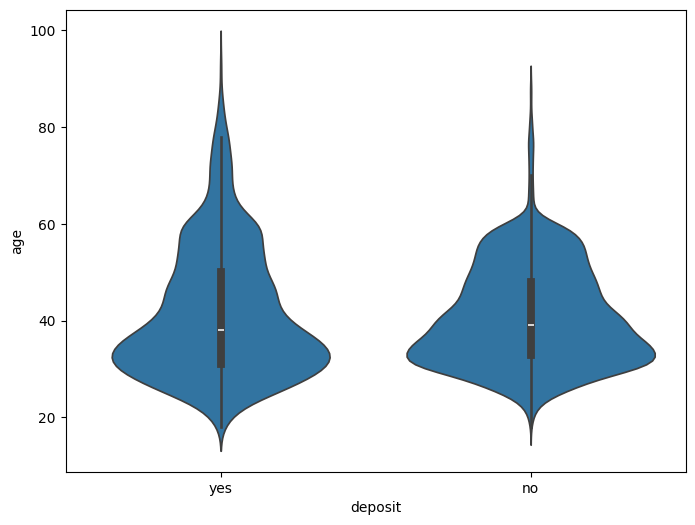

<Figure size 800x600 with 0 Axes>

In [66]:
# violin plot for age with default colors
sns.violinplot(x="deposit", y="age", data=bank)

# Adjusting figure size using Matplotlib
plt.figure(figsize=(8, 6))  # Set the size of the plot

plt.show()



Age : This is age of client. A violin plot for age is plotted. It shows its spread as well as histogram. People saying yes has more spread.

In [67]:
bank["deposit"].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

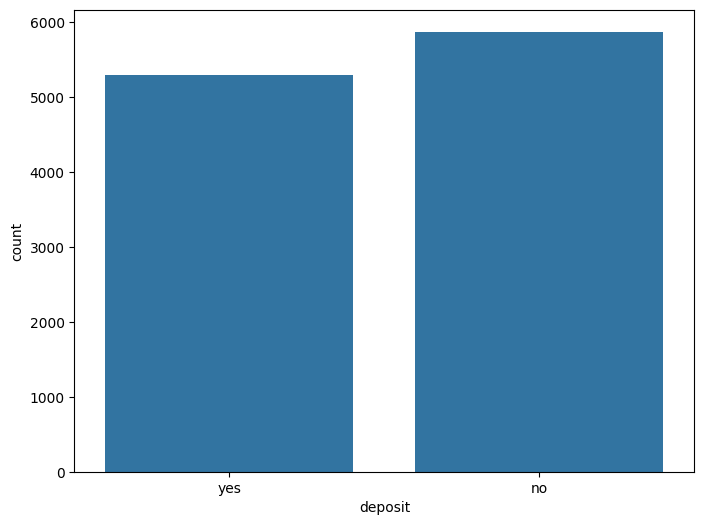

In [68]:
# count plot for deposit
#the dataset is fairly balanced
sns.countplot(data=bank,x=bank['deposit'])

Deposit : Whether the clients said yes to subscribe for a term deposit. It has two categories. ‘yes’ or ‘no’.

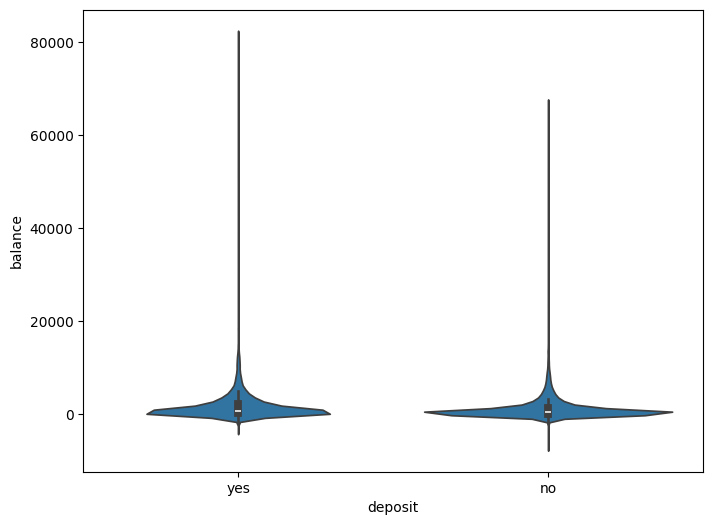

<Figure size 800x600 with 0 Axes>

In [69]:
# violin plot for balance
sns.violinplot(x="deposit", y="balance", data=bank)

# Adjusting figure size using Matplotlib
plt.figure(figsize=(8, 6))  # Set the size of the plot

plt.show()


Most clients have low balances regardless of their deposit decision, but there are a few high-balance outliers in both groups.


In [70]:
bank["poutcome"].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

<Axes: xlabel='poutcome'>

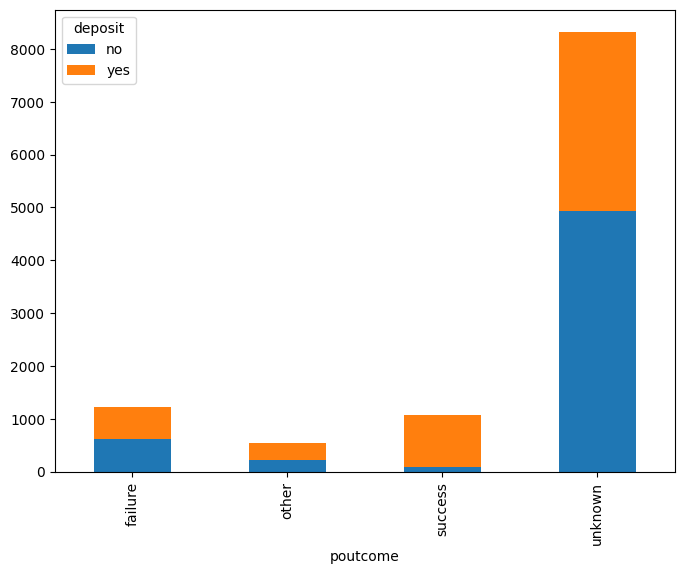

In [71]:
# bar chart for poutcome
types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

poutcome : The outcome of previous marketing campaign. It’s a categorical feature. Many of them were not contacted in previous campaign.

In [72]:
bank["previous"].value_counts()

previous
0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
23       2
16       2
27       2
20       2
58       1
22       1
30       1
29       1
55       1
26       1
21       1
41       1
40       1
28       1
18       1
37       1
Name: count, dtype: int64

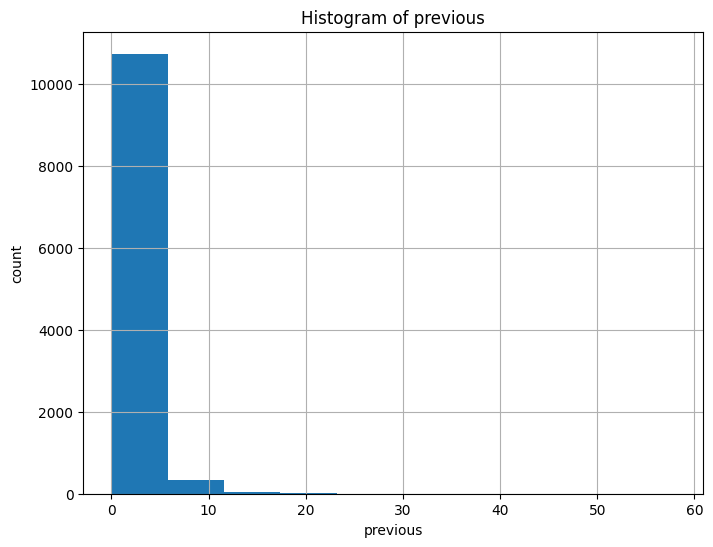

In [73]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Previous : Number of times this client was contacted before this campaign.

In [74]:
bank["pdays"].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 717       1
 159       1
 118       1
 241       1
 15        1
Name: count, Length: 472, dtype: int64

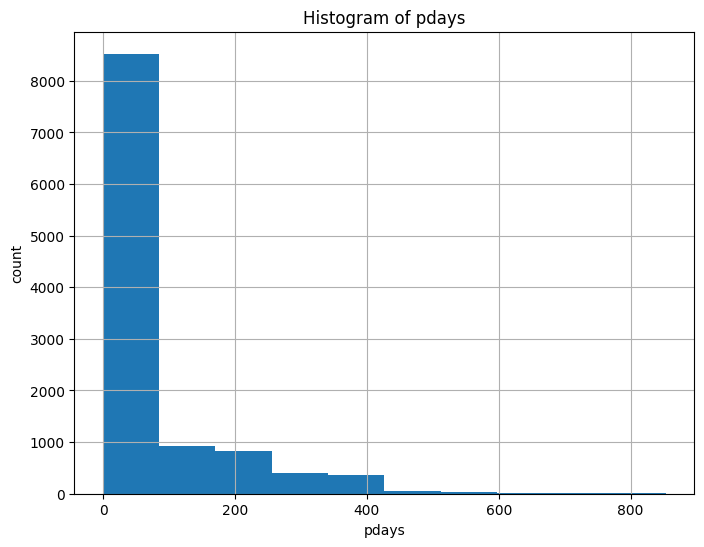

In [75]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

Pdays : number of days that passed after the client was last contacted in previous campaign. Its value is -1 if the client was not contacted previously.

In [76]:
bank["campaign"].value_counts()

campaign
1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
21       8
18       8
24       5
19       5
20       5
30       4
22       4
26       3
25       3
23       3
29       2
32       2
43       2
41       1
27       1
63       1
28       1
33       1
31       1
Name: count, dtype: int64

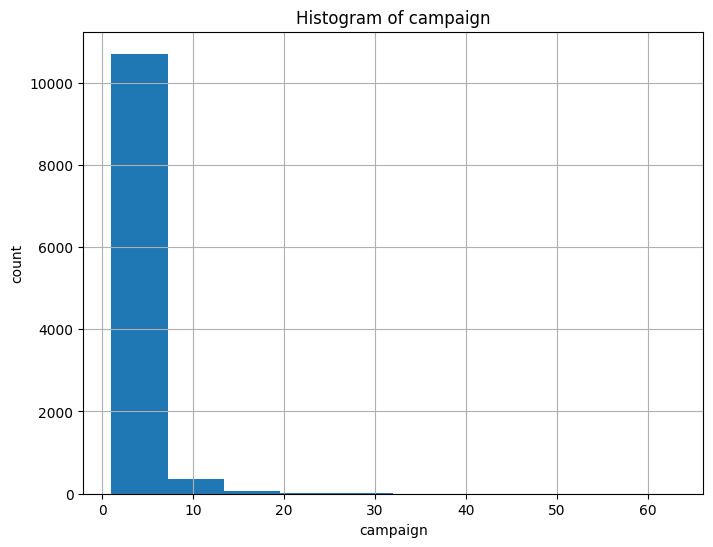

In [77]:
#Histogram of campaign
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

campaign : Number of times this client was contacted during this campaign. 

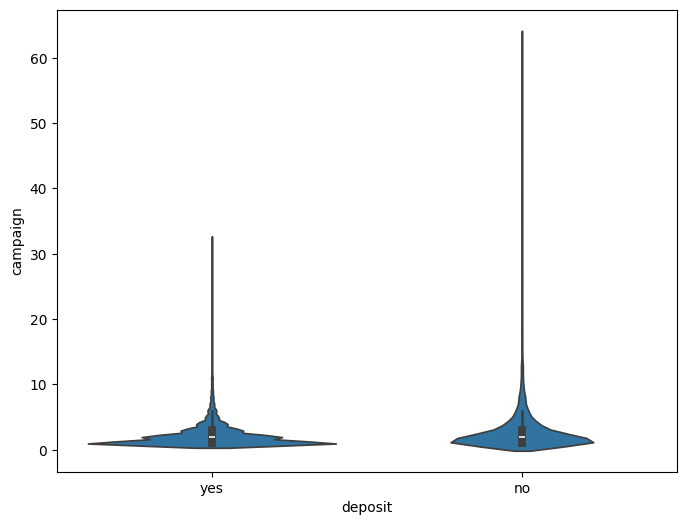

<Figure size 800x600 with 0 Axes>

In [78]:
# Violin plot for campaign
sns.violinplot(x="deposit", y="campaign", data=bank)

# Ajuster la taille de la figure avec Matplotlib
plt.figure(figsize=(8, 6))  # Définir la taille du graphique

plt.show()


In [79]:
bank["month"].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

<Axes: xlabel='month'>

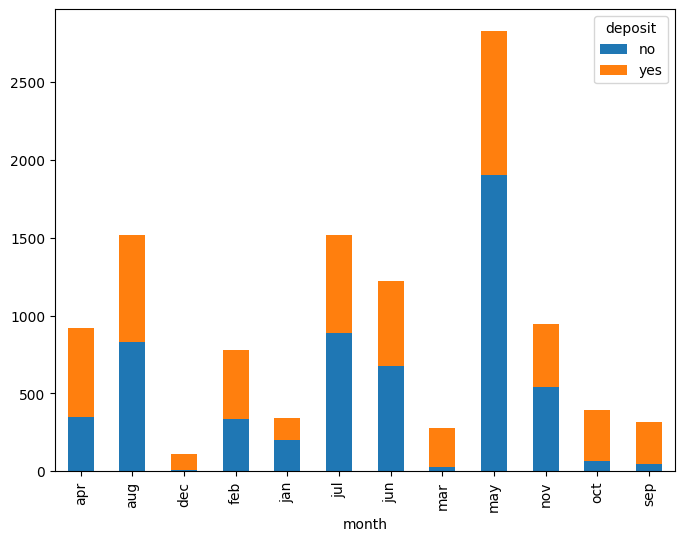

In [80]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Month : the month in which the client was contacted. Maximum clients were contacted in May. 

In [81]:
bank["day"].value_counts()

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
1     122
24    122
Name: count, dtype: int64

<Axes: xlabel='day'>

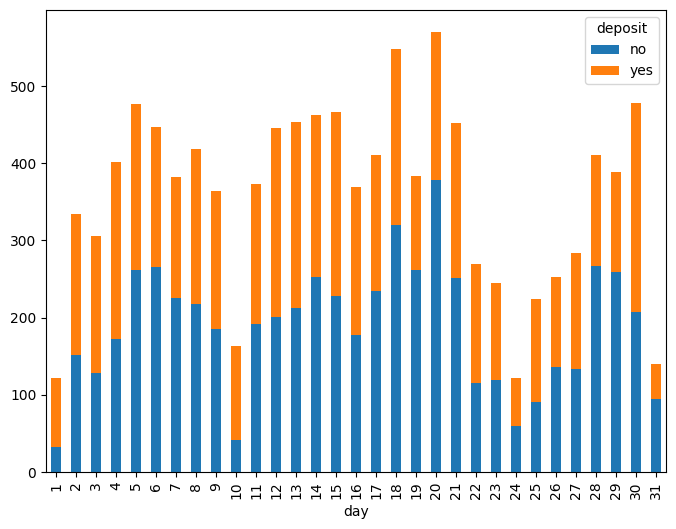

In [82]:
# group by days to display bar chart
types = bank.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Day : which day of the month was the client contacted. More clients were contacted in the middle of the month.

In [83]:
bank["contact"].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

<Axes: xlabel='contact'>

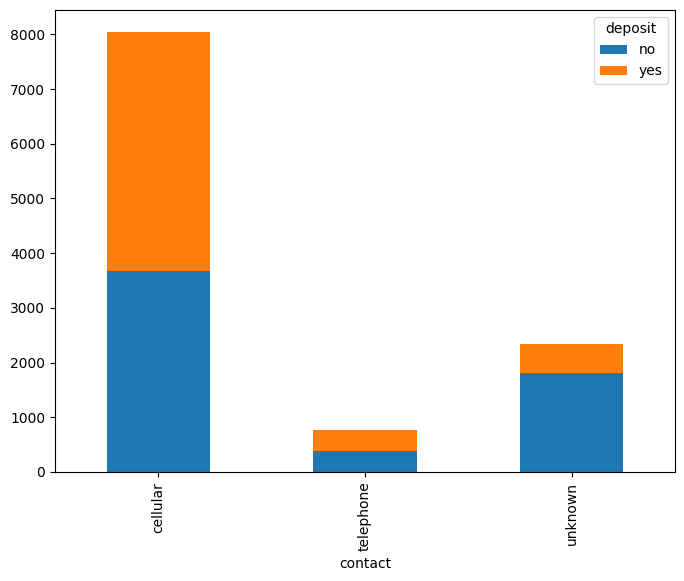

In [84]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Contact : This feature specifies the way of communication. It can be cellular or telephone. Some of them are unknown.

In [85]:
bank["loan"].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

<Axes: xlabel='loan'>

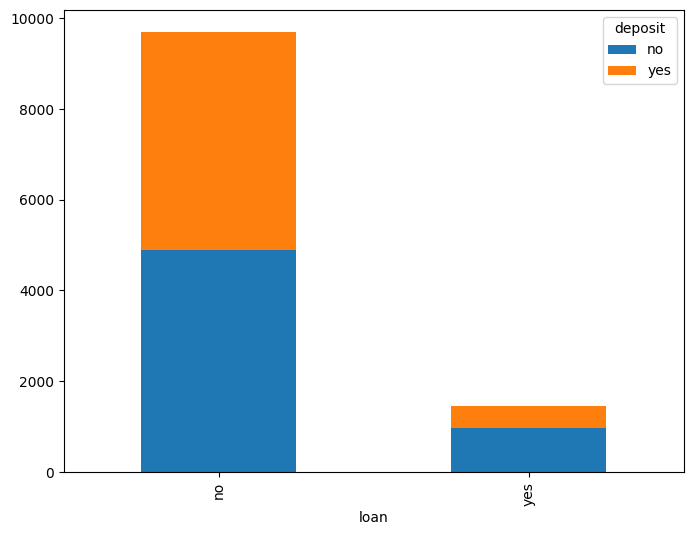

In [86]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Loan : Most of them don’t already have personal loan in bank.

<Axes: xlabel='marital'>

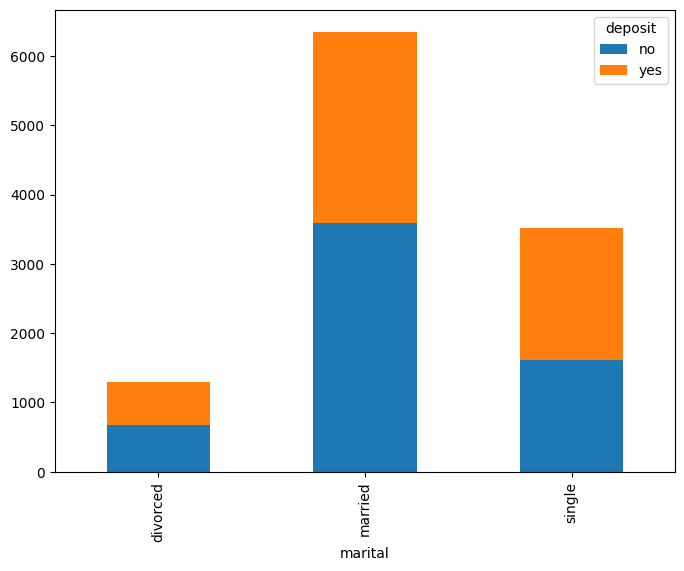

In [87]:
# group by marital to display bar chart
types = bank.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Marital : This is a categorical feature. It has 3 categories. Married clients constitute the largest portion of this feature.

In [88]:
bank["housing"].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

<Axes: xlabel='housing'>

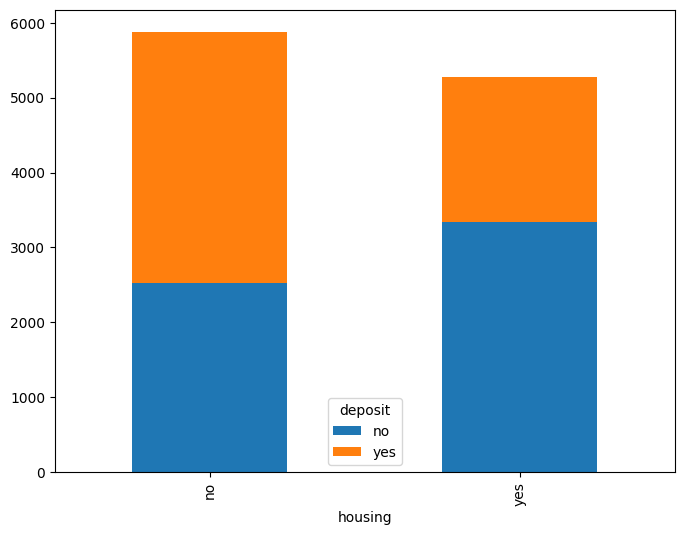

In [89]:
# group by housing to display bar chart
types = bank.groupby("housing")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more. 

In [90]:
bank["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

<Axes: xlabel='default'>

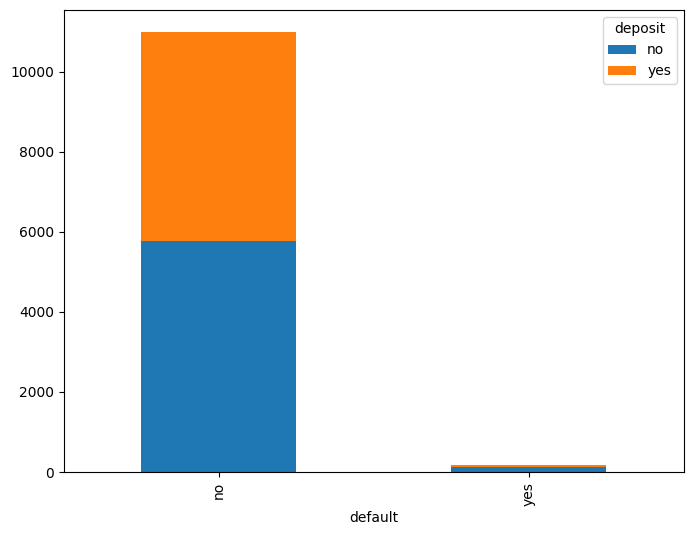

In [91]:
# group by default to display bar chart
types = bank.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Default : it tells whether the client has credit in bank or not? Most of them don’t have credit.

In [92]:
bank["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

<Axes: xlabel='job'>

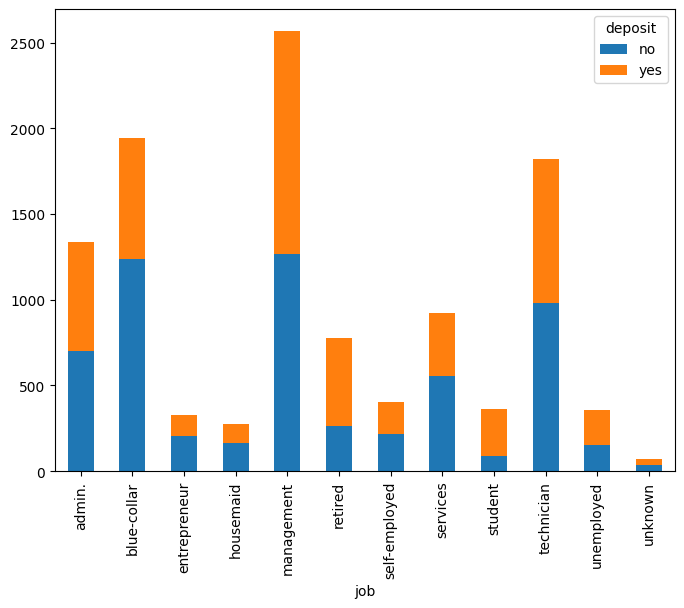

In [93]:
# group by job to display bar chart
types = bank.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Job : This is a categorical feature. It has 12 categories including unknown. The largest clients in this category belong to management jobs with percentage of 50 while unknown category has least count.

In [94]:
bank["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

<Axes: xlabel='education'>

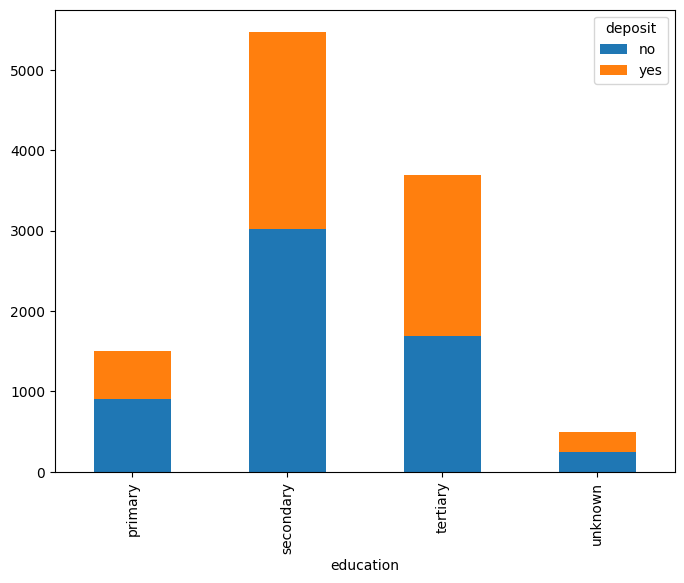

In [95]:
# group by education to display bar chart
types = bank.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Education : Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category. 

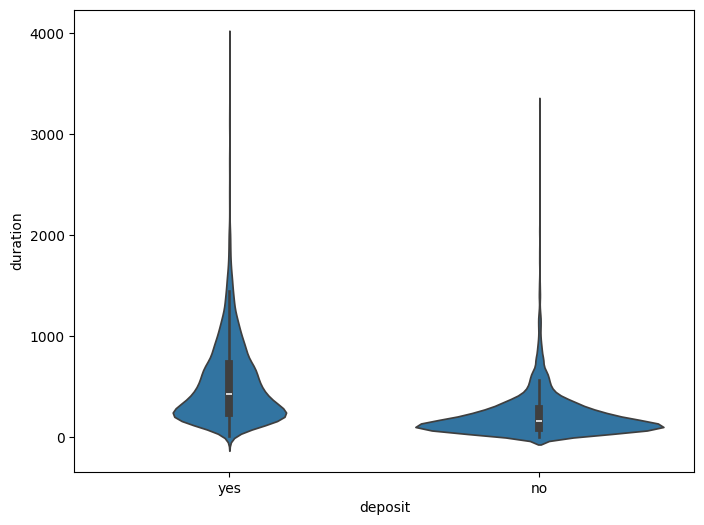

In [96]:
# Violin plot for duration
plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.violinplot(x="deposit", y="duration", data=bank)

# Affichage
plt.show()


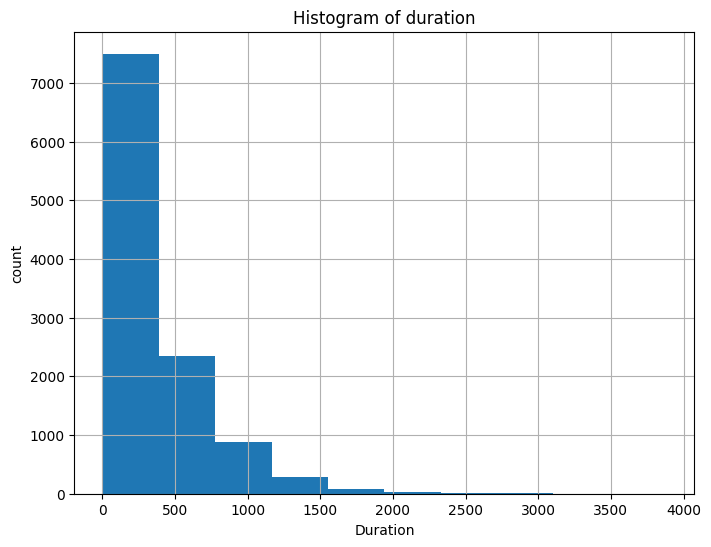

In [97]:
#Histogram of duration
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

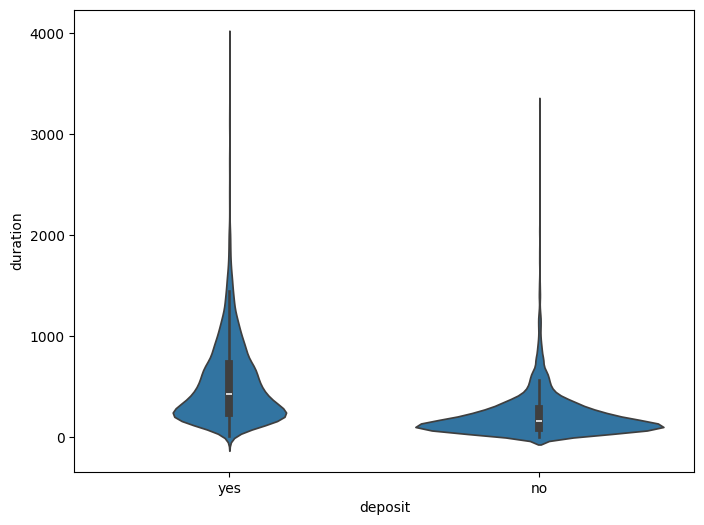

In [98]:
# Violin plot for duration
plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.violinplot(x="deposit", y="duration", data=bank)

# Affichage
plt.show()


Duration : The duration of call in seconds when the client was contacted last time. A histogram is plotted  for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

# Preprocessing

In [99]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
bank['deposit'].replace(to_replace='no',  value=0, inplace=True)
bank['deposit'].head()

/tmp/ipykernel_31263/4029121401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
/tmp/ipykernel_31263/4029121401.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [100]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

/tmp/ipykernel_31263/3023649940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['loan'].replace(to_replace='no', value=1, inplace=True)
/tmp/ipykernel_31263/3023649940.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [101]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

/tmp/ipykernel_31263/1930029562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['default'].replace(to_replace='no', value=1, inplace=True)
/tmp/ipykernel_31263/1930029562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [102]:
bank["loan"].value_counts()

loan
1    9702
0    1460
Name: count, dtype: int64

In [103]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

/tmp/ipykernel_31263/1274977902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['housing'].replace(to_replace='no', value=1, inplace=True)
/tmp/ipykernel_31263/1274977902.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1


In [104]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)

In [105]:
bank = bank.drop('divorced',axis = 1)

In [106]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,59,admin.,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,True,False
1,56,admin.,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,True,False
2,41,technician,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,True,False
3,55,services,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,True,False
4,54,admin.,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,True,False


In [107]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,primary,secondary,tertiary
0,59,admin.,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,True,False,False,True,False
1,56,admin.,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,True,False,False,True,False
2,41,technician,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,True,False,False,True,False
3,55,services,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,True,False,False,True,False
4,54,admin.,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,True,False,False,False,True


In [108]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,1,2343,0,1,unknown,5,may,1042,1,...,False,False,False,False,False,False,False,False,False,False
1,56,1,45,1,1,unknown,5,may,1467,1,...,False,False,False,False,False,False,False,False,False,False
2,41,1,1270,0,1,unknown,5,may,1389,1,...,False,False,False,False,False,False,False,False,True,False
3,55,1,2476,0,1,unknown,5,may,579,1,...,False,False,False,False,False,False,True,False,False,False
4,54,1,184,1,1,unknown,5,may,673,2,...,False,False,False,False,False,False,False,False,False,False


In [109]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,59,1,2343,0,1,5,may,1042,1,-1,...,False,False,False,False,False,False,False,False,False,False
1,56,1,45,1,1,5,may,1467,1,-1,...,False,False,False,False,False,False,False,False,False,False
2,41,1,1270,0,1,5,may,1389,1,-1,...,False,False,False,False,False,False,True,False,False,False
3,55,1,2476,0,1,5,may,579,1,-1,...,False,False,False,False,True,False,False,False,False,False
4,54,1,184,1,1,5,may,673,2,-1,...,False,False,False,False,False,False,False,False,False,False


In [110]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [111]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [112]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            11162 non-null  int64
 1   default        11162 non-null  int64
 2   balance        11162 non-null  int64
 3   housing        11162 non-null  int64
 4   loan           11162 non-null  int64
 5   day            11162 non-null  int64
 6   duration       11162 non-null  int64
 7   campaign       11162 non-null  int64
 8   pdays          11162 non-null  int64
 9   previous       11162 non-null  int64
 10  deposit        11162 non-null  int64
 11  married        11162 non-null  bool 
 12  single         11162 non-null  bool 
 13  primary        11162 non-null  bool 
 14  secondary      11162 non-null  bool 
 15  tertiary       11162 non-null  bool 
 16  admin.         11162 non-null  bool 
 17  blue-collar    11162 non-null  bool 
 18  entrepreneur   11162 non-null  bool 
 19  hous

**NOTE**
All Features are converted to numerical

In [113]:
tempDF=bank['deposit']

In [114]:
bank=bank.drop('deposit',axis=1)

In [115]:
bank['deposit']=tempDF
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,True,1


In [116]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop('deposit',axis=1))
scaled_features=scaler.transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [117]:
bank_feat['deposit']=tempDF

In [118]:
# store standardised data in csv
bank_feat.to_csv("standardisedBank.csv")

# Correlation with Class variable 'deposit'

In [119]:
CorrBank=bank_feat.drop("deposit", axis=1).apply(lambda x: x.corr(bank_feat.deposit))

In [120]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

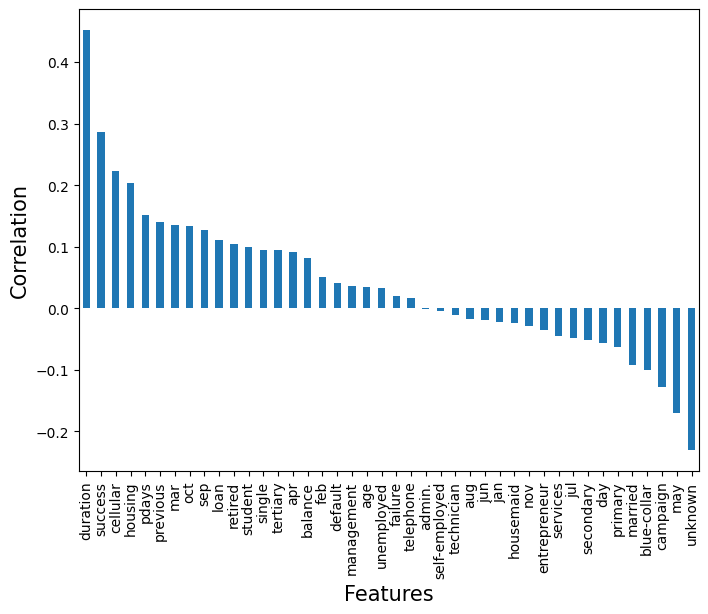

In [121]:

Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

**Notes : **
1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client. 
2. If the call duration is more , there are higher chances of getting a yes from the client. 
3. It has been sorted in descending order.
4. Succes , cellular, housing, unknown, campaign are also highly correlated